In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Definimos las variables

In [2]:
N = 2*12 # Número de meses
r = np.zeros([N+1, N+1]) # Arbol Binomial
Q = np.zeros([N+1, N+1]) # Precios Arrow-Debreu
theta = np.zeros(N+1) # Drift
dt = 1/12 # Delta t
# sigma = 0.02952452925930132 # Volatilidad

In [3]:
with open('r1m.txt', 'r') as file:
    retorno_spot = file.read()
    retorno_spot = retorno_spot.split(',')
    for i in range(len(retorno_spot)):
        retorno_spot[i] = float(retorno_spot[i])
    aux = np.array(retorno_spot) / 100

# rho = np.zeros(N+1)
# rho[1:] = aux[1:] - aux[:-1]

In [4]:
def ewma_volatility(file_name):

    with open(file_name, 'r') as file:
        retorno_spot = file.read()
        retorno_spot = retorno_spot.split(',')
        for i in range(len(retorno_spot)):
            retorno_spot[i] = float(retorno_spot[i])
    aux = np.array(retorno_spot) / 100 # convertir tasas de porcentaje a decimal


    beta = 0.94 # es el factor de decaimiento
    # frecuencia = dt

    sigma2 = np.zeros(len(aux))

    for t in range(1, len(aux)):
        sigma2[t] = (beta * sigma2[t-1] + (1 - beta) * ((aux[t] - aux[t-1])) ** 2)


    sigma = np.sqrt(sigma2 * 360)

    return sigma




In [5]:
sigma = ewma_volatility('r1m.txt')

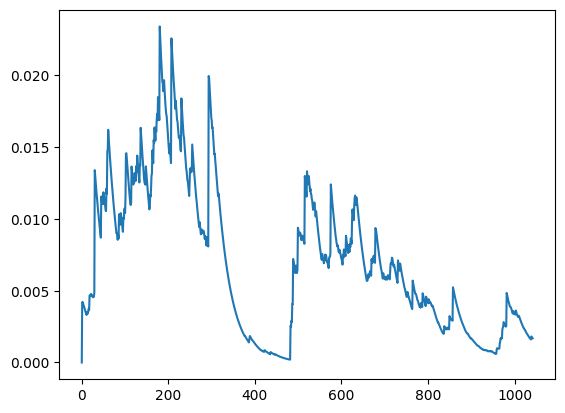

In [7]:
T = np.linspace(0, len(sigma), len(sigma))

plt.plot(T, sigma)


In [8]:
with open("sigma_EWMA.txt", "w", encoding="utf-8") as f:
    f.write(",".join(map(str, sigma)))

In [8]:
beta = 0.94 # es el factor de decaimiento
# frecuencia = dt
# rho = r - r[]



In [21]:
# N = 2*12 # Número de meses
# r = np.zeros([N+1, N+1]) # Arbol Binomial
# Q = np.zeros([N+1, N+1]) # Precios Arrow-Debreu
# theta = np.zeros(N+1) # Drift
# dt = 1/12 # Delta t

def HoLee(sigma, N, dt, r0, df_filename):
    r = np.zeros([N+1, N+1]) # Arbol Binomial
    Q = np.zeros([N+1, N+1]) # Precios Arrow-Debreu
    theta = np.zeros(N+1) # Drift

    # Llenar estado inicial

    r[0][0] = r0 # Tasa inicial
    Q[0][0] = 1 # Precio inicial

    # Leer factores de descuento
    with open(df_filename, 'r') as file:
        discount_factors = file.read()

    discount_factors = discount_factors.split(',')
    for i in range(len(discount_factors)):
        discount_factors[i] = float(discount_factors[i])
    P = np.array(discount_factors)

    theta[0] = (1/dt ** 2) * (np.log((np.exp(-r[0][0] * dt) + np.exp(-(r[0][0] + 2 * sigma * np.sqrt(dt)) * dt)) / (2 * P[1]))) + sigma/np.sqrt(dt)

    # tasas nivel 1

    r[1][1] = r[0][0] + theta[0]*dt + sigma*np.sqrt(dt)
    r[0][1] = r[0][0] + theta[0]*dt - sigma*np.sqrt(dt)

    # iteracion de cada nivel

    for j in range(1,N):

        # Precios Arrow-Debreu
        for i in range(0, j+1):
            if i == 0:
                Q[i][j] = np.exp(-r[i][j] * dt) * 0.5 * Q[i][j-1]
            elif i == j:
                Q[i][j] = np.exp(-r[i][j] * dt) * 0.5 * Q[j-1][j-1]
            else:
                Q[i][j] = np.exp(-r[i][j] * dt) * 0.5 * (Q[i-1][j-1] + Q[i][j-1])
        
        # f auxiliar
        f = Q[0][j]*np.exp(-r[0][j] * dt) + sum([(Q[k-1][j] + Q[k][j])*np.exp(-r[k][j] * dt) for k in range(1, j+1)]) + Q[j][j]*np.exp(-(r[0][0] + 2 * sigma * np.sqrt(dt)) * dt)
        # theta
        theta[j] = (1/dt ** 2) * np.log(f / (2 * P[j+1])) + sigma/np.sqrt(dt)

        # Tasas
        for i in range(0, j+1):
            r[i][j+1] = r[i][j] + theta[j]*dt - sigma*np.sqrt(dt)
        r[j+1][j+1] = r[j][j] + theta[j]*dt + sigma*np.sqrt(dt)
    
    return r,Q,theta

    

In [17]:
sigma = ewma_volatility('r1m.txt')
sigma = sigma[-1]

Llenar estado inicial

In [18]:
r[0][0] = 0.04761 # Tasa inicial
Q[0][0] = 1 # Precio inicial

# Leer factores de descuento
with open('df.txt', 'r') as archivo:
    discount_factors = archivo.read()
    discount_factors = discount_factors.split(',')
    for i in range(len(discount_factors)):
        discount_factors[i] = float(discount_factors[i])
    P = np.array(discount_factors)


theta[0] = (1/dt ** 2) * (np.log((np.exp(-r[0][0] * dt) + np.exp(-(r[0][0] + 2 * sigma * np.sqrt(dt)) * dt)) / (2 * P[1]))) + sigma/np.sqrt(dt)

Tasas nivel 1

In [19]:
r[1][1] = r[0][0] + theta[0]*dt + sigma*np.sqrt(dt)
r[0][1] = r[0][0] + theta[0]*dt - sigma*np.sqrt(dt)

Iteración de cada nivel

In [20]:
for j in range(1,N):

    # Precios Arrow-Debreu
    for i in range(0, j+1):
        if i == 0:
            Q[i][j] = np.exp(-r[i][j] * dt) * 0.5 * Q[i][j-1]
        elif i == j:
            Q[i][j] = np.exp(-r[i][j] * dt) * 0.5 * Q[j-1][j-1]
        else:
            Q[i][j] = np.exp(-r[i][j] * dt) * 0.5 * (Q[i-1][j-1] + Q[i][j-1])
    
    # f auxiliar
    f = Q[0][j]*np.exp(-r[0][j] * dt) + sum([(Q[k-1][j] + Q[k][j])*np.exp(-r[k][j] * dt) for k in range(1, j+1)]) + Q[j][j]*np.exp(-(r[0][0] + 2 * sigma * np.sqrt(dt)) * dt)
    # theta
    theta[j] = (1/dt ** 2) * np.log(f / (2 * P[j+1])) + sigma/np.sqrt(dt)

    # Tasas
    for i in range(0, j+1):
        r[i][j+1] = r[i][j] + theta[j]*dt - sigma*np.sqrt(dt)
    r[j+1][j+1] = r[j][j] + theta[j]*dt + sigma*np.sqrt(dt)
    

In [14]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

def plot_ho_lee_lattice(r: np.ndarray, dt: float, sigma, title="Lattice de Ho–Lee"):
    """
    r: matriz triangular (n+1 x n+1) con r[i,j] definido para i<=j (NaN fuera)
       r en DECIMAL (p.ej. 0.0184 = 1.84%)
    dt: tamaño del paso en años (ej: 1/12 si mensuales, 0.25 si trimestrales)
    """
    n = r.shape[0] - 1
    # T = np.arange(n + 1) * dt
    T = np.arange(n + 1) / 12

    fig, ax = plt.subplots(figsize=(10, 5))

    # Dibujar aristas (padre j -> hijos en j+1)
    for j in range(n):
        for i in range(j + 1):
            if np.isfinite(r[i, j]) and np.isfinite(r[i, j+1]):
                ax.plot([T[j], T[j+1]],
                        [r[i, j], r[i, j+1]],
                        color="red", lw=0.8)
            if np.isfinite(r[i, j]) and np.isfinite(r[i+1, j+1]):
                ax.plot([T[j], T[j+1]],
                        [r[i, j], r[i+1, j+1]],
                        color="red", lw=0.8)

    # (Opcional) marcar nodos
    for j in range(n + 1):
        y = r[:j+1, j]
        x = np.full(j + 1, T[j])
        ax.plot(x, y, "o", ms=2, color="black")

    # Formato ejes
    ax.set_xlim(T[0], T[-1])
    # ymin = np.nanmin(r); ymax = np.nanmax(r)
    # ylim = max(abs(ymin), abs(ymax))
    # pad = 0.05 * (ymax - ymin if np.isfinite(ymax - ymin) and ymax != ymin else 0.02)
    # ax.set_ylim(-ylim - pad, ylim + pad)
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))  # muestra % (r en decimal)
    ax.grid(True, alpha=0.3)
    ax.set_xlabel("Plazo (años)")
    ax.set_ylabel("Tasa")
    ax.set_title(title + f', sigma = {round(sigma * 100, 3) * 100} BPS')
    plt.tight_layout()
    plt.show()

In [26]:

from matplotlib.ticker import PercentFormatter
def pascal_factors_funct(m: int) -> np.array:
    pascal_factors = np.zeros([m,m])
    for j in range(m):
        for i in range(m):
            if i == 0 or i==j:
                pascal_factors[i][j] = 1
            else:
                pascal_factors[i][j] = pascal_factors[i][j-1] + pascal_factors[i-1][j-1]
    return pascal_factors

def esperanza(m: int, r: np.array, pascal_factors: np.array) -> np.array:
    expected_value = np.zeros(m+1)
    for t in range(m+1):
        expected_value[t] = 2 ** (-t)*np.dot(r[:,t], pascal_factors[:,t])
    return expected_value
def plot_ho_lee_lattice(
    r: np.ndarray,
    dt: float,
    sigma: float,
    title: str = "Lattice de Ho–Lee",
    mostrar_esperanza: bool = False
):
    """
    r : matriz triangular (n+1 x n+1) con r[i,j] definido para i<=j (NaN fuera)
        r en DECIMAL (p.ej. 0.0184 = 1.84%)
    dt : tamaño del paso en años (ej: 1/12 si mensuales, 0.25 si trimestrales)
    sigma : volatilidad anual (decimal)
    mostrar_esperanza : si True, traza E[r_t] usando pascal_factors_funct y esperanza
                        (deben existir en el namespace)
    """
    n = r.shape[0] - 1
    T = np.arange(n + 1) * dt  # eje en años

    fig, ax = plt.subplots(figsize=(10, 5))

    # --- aristas del lattice ---
    for j in range(n):
        for i in range(j + 1):
            if np.isfinite(r[i, j]) and np.isfinite(r[i, j+1]):
                ax.plot([T[j], T[j+1]], [r[i, j], r[i, j+1]], color="red", lw=0.8)
            if np.isfinite(r[i, j]) and np.isfinite(r[i+1, j+1]):
                ax.plot([T[j], T[j+1]], [r[i, j], r[i+1, j+1]], color="red", lw=0.8)

    # --- nodos ---
    for j in range(n + 1):
        y = r[:j+1, j]
        x = np.full(j + 1, T[j])
        ax.plot(x, y, "o", ms=2, color="black")

    # --- esperanza por tenor (opcional) ---
    if mostrar_esperanza:
        m = n  # nº total de pasos (meses si dt=1/12)
        # llamamos a TUS funciones (se asume que están definidas en tu entorno)
        pascal_factors = pascal_factors_funct(m+1)
        mu = esperanza(m, r, pascal_factors)  # vector de largo m+1
        ax.plot(T, mu, lw=2.2, color="blue", label="E[r_t]")
        ax.legend(loc="upper left")

    # formato ejes
    ax.set_xlim(T[0], T[-1])
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))  # r en %
    ax.grid(True, alpha=0.3)
    ax.set_xlabel("Plazo (años)")
    ax.set_ylabel("Tasa")

    # título con sigma en bps
    bps = sigma * 1e4
    ax.set_title(f"{title} (σ = {bps:.1f} bps)")

    plt.tight_layout()
    plt.show()


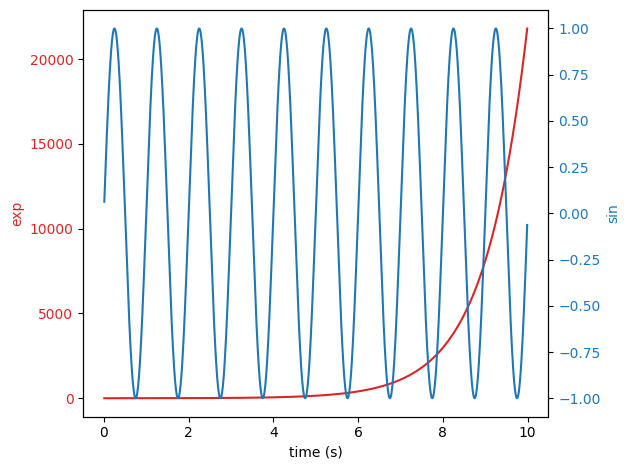

In [10]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.01, 10.0, 0.01)
data1 = 
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
